In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.cluster import KMeans
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
wcss = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))

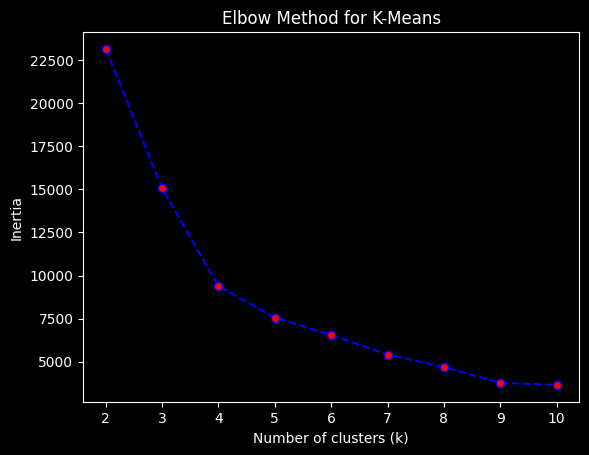

In [4]:
plt.plot(
    range(2, 11),
    wcss,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.savefig("Images/Elbow_Method.png", bbox_inches="tight")

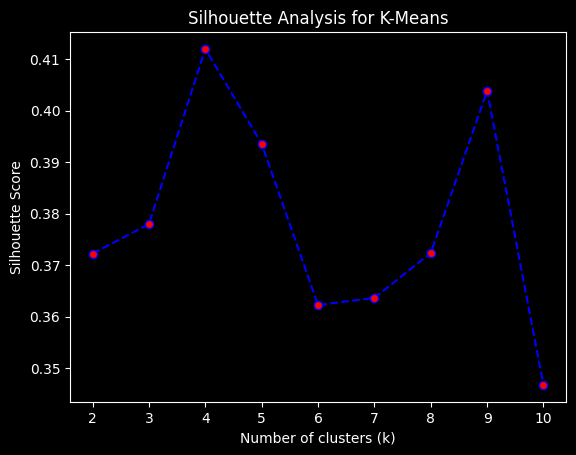

In [5]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for K-Means")
plt.savefig("Images/Silhouette_Analysis.png", bbox_inches="tight")

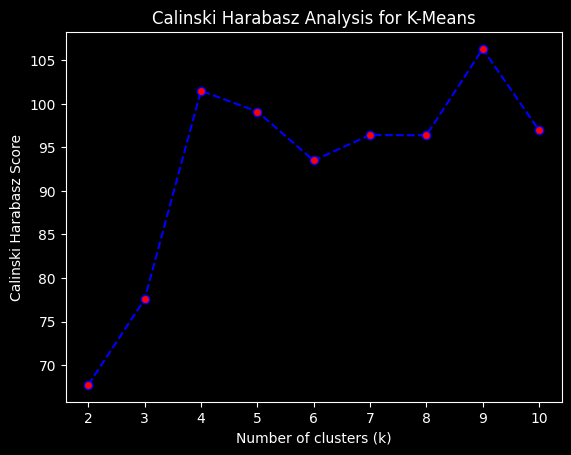

In [6]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for K-Means")
plt.savefig("Images/Calinski_Harabasz_Analysis.png", bbox_inches="tight")

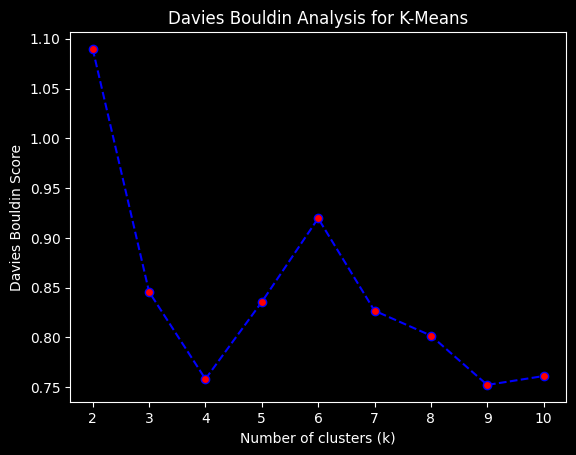

In [7]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for K-Means")
plt.savefig("Images/Davies_Bouldin_Analysis.png", bbox_inches="tight")

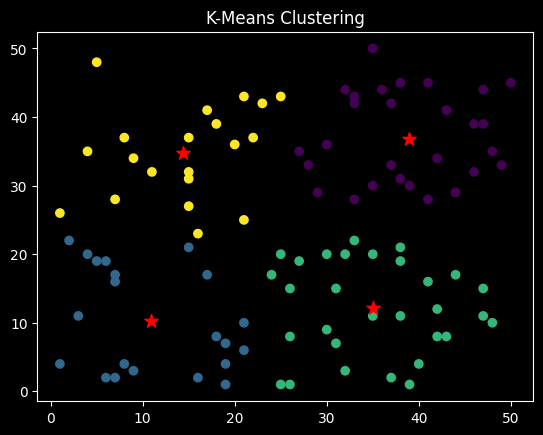

In [8]:
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker=MarkerStyle("*"), c="red", s=100)
plt.title("K-Means Clustering")
plt.savefig("Images/K-Means.png", bbox_inches="tight")

In [9]:
kmeans.inertia_

9186.156157635469

In [10]:
silhouette_score(df, cluster_labels)

np.float64(0.4169709408592874)

In [11]:
calinski_harabasz_score(df, cluster_labels)

np.float64(104.28270829681223)

In [12]:
davies_bouldin_score(df, cluster_labels)

np.float64(0.7593946409761686)

In [13]:
dump(kmeans, "../../../Models/k-MeansCluster.joblib")

['../../../Models/k-MeansCluster.joblib']